In [83]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json
import os


In [84]:
input_folder = ""

#Reading config file to read the actual data location and if succeded read the csv file
try:
    with open ("config_file.json", 'r') as file:
        config_data = json.load(file)
        input_folder = config_data['input_data_path']
        print(input_folder)
except (FileNotFoundError, json.JSONDecodeError) as e:
    print("Error when reading configuration file see error bellow \n")
    print(e)

C:/BeCode/rainflow_prediction_data/


In [85]:
df_mintemp = pd.read_csv(os.path.join(input_folder, "MinTemp.csv"))
df_mintemp.columns = df_mintemp.columns.to_series().apply(lambda x: x.strip())

df_maxtemp = pd.read_csv(os.path.join(input_folder, "MaxTemp.csv"))
df_maxtemp.columns = df_maxtemp.columns.to_series().apply(lambda x: x.strip())


In [86]:
df_rainfall = pd.read_csv("C:/BeCode/rainflow_prediction_data/Rainfall.csv")
df_rainfall.columns = df_rainfall.columns.to_series().apply(lambda x: x.strip())

In [87]:
df_observedflow = pd.read_csv("C:/BeCode/rainflow_prediction_data/ObservedFlow.csv")
df_observedflow.columns = df_observedflow.columns.to_series().apply(lambda x: x.strip())

In [88]:
df_observedflow['month_year'] = pd.to_datetime(df_observedflow['date'], format='%b-%y').dt.to_period('M')
df_observedflow.drop('date', inplace=True, axis=1)
df_observedflow

,flow,month_year
0,0.697032,1990-01
1,1.296357,1990-02
2,1.788548,1990-03
3,1.253267,1990-04
4,2.202581,1990-05
...,...,...
235,51.142452,2009-08
236,26.657967,2009-09
237,10.115806,2009-10
238,3.046133,2009-11


In [89]:
print(df_maxtemp.shape)
print(df_mintemp.shape)
print(df_rainfall.shape)

(9131, 4)
(9131, 4)
(9131, 4)


In [90]:
df_mintemp.head(5)

,day,month,Years,OBS
0,1,1,1990,8.2
1,2,1,1990,8.0
2,3,1,1990,8.5
3,4,1,1990,6.1
4,5,1,1990,7.2


In [91]:
def get_monthly_average(df, target_col_name='OBS'):
    df['date'] = pd.to_datetime(df[['Years', 'month', 'day']])
    df.drop(columns = ['Years', 'month', 'day'], axis=1, inplace=True)
    df_averaged = df.groupby([df['date'].dt.to_period('M')])[target_col_name].mean().reset_index()
    df_averaged = df_averaged.rename(columns={'date': 'month_year', target_col_name: 'monthly_avg_' + target_col_name})
    # df_averaged = df_averaged.drop(columns='day')
    return df_averaged


In [92]:
df_mintemp.head(5)

,day,month,Years,OBS
0,1,1,1990,8.2
1,2,1,1990,8.0
2,3,1,1990,8.5
3,4,1,1990,6.1
4,5,1,1990,7.2


In [93]:
df_mintemp_averaged = get_monthly_average(df_mintemp)
df_mintemp_averaged

,month_year,monthly_avg_OBS
0,1990-01,7.996774
1,1990-02,10.167857
2,1990-03,10.077419
3,1990-04,10.413333
4,1990-05,9.709677
...,...,...
295,2014-08,10.312903
296,2014-09,10.303333
297,2014-10,8.977419
298,2014-11,7.723333


In [94]:
df_maxtemp_averaged = get_monthly_average(df_maxtemp, 'MAX.TMP' )
df_maxtemp_averaged

,month_year,monthly_avg_MAX.TMP
0,1990-01,23.885806
1,1990-02,22.907143
2,1990-03,23.885806
3,1990-04,24.582667
4,1990-05,24.862581
...,...,...
295,2014-08,20.914194
296,2014-09,21.513333
297,2014-10,23.331613
298,2014-11,23.157333


In [95]:
df_rainfall.rename(columns = {'Dyas':'day', 'Months':'month'}, inplace = True)
df_rainfall_averaged = get_monthly_average(df_rainfall, 'Rainfall (mm)' )
df_rainfall_averaged

,month_year,monthly_avg_Rainfall (mm)
0,1990-01,0.406774
1,1990-02,3.013214
2,1990-03,2.690000
3,1990-04,1.874000
4,1990-05,2.956129
...,...,...
295,2014-08,7.595161
296,2014-09,6.996333
297,2014-10,1.995161
298,2014-11,1.195667


In [96]:
df_rainfall.head(5)

,Rainfall (mm),date
0,0.00,1990-01-01
1,0.63,1990-01-02
2,0.00,1990-01-03
3,1.27,1990-01-04
4,0.48,1990-01-05


In [97]:
df_merged = pd.merge(df_maxtemp, df_mintemp, on=['date'], how = 'inner')
df_merged_avg = pd.merge(df_maxtemp_averaged, df_mintemp_averaged, on=['month_year'], how = 'inner')


In [98]:
rainfall = df_rainfall['Rainfall (mm)']
df_merged['Rainfall (mm)']=rainfall
df_merged.head()

,MAX.TMP,date,OBS,Rainfall (mm)
0,22.12,1990-01-01,8.2,0.00
1,22.26,1990-01-02,8.0,0.63
2,22.72,1990-01-03,8.5,0.00
3,23.58,1990-01-04,6.1,1.27
4,23.56,1990-01-05,7.2,0.48


In [99]:
print(df_rainfall.columns)

Index(['Rainfall (mm)', 'date'], dtype='object')


In [100]:
rainfall_avg = df_rainfall_averaged['monthly_avg_Rainfall (mm)']
df_merged_avg['monthly_avg_Rainfall (mm)']=rainfall_avg
df_merged_avg.head()

,month_year,monthly_avg_MAX.TMP,monthly_avg_OBS,monthly_avg_Rainfall (mm)
0,1990-01,23.885806,7.996774,0.406774
1,1990-02,22.907143,10.167857,3.013214
2,1990-03,23.885806,10.077419,2.690000
3,1990-04,24.582667,10.413333,1.874000
4,1990-05,24.862581,9.709677,2.956129


In [101]:
df_merged.isnull().sum()

MAX.TMP          0
date             0
OBS              0
Rainfall (mm)    0
dtype: int64

In [102]:
df_merged.head(5)

,MAX.TMP,date,OBS,Rainfall (mm)
0,22.12,1990-01-01,8.2,0.00
1,22.26,1990-01-02,8.0,0.63
2,22.72,1990-01-03,8.5,0.00
3,23.58,1990-01-04,6.1,1.27
4,23.56,1990-01-05,7.2,0.48


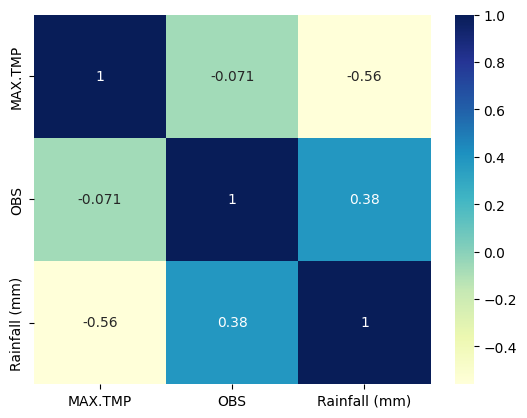

In [103]:
corrln = df_merged[['MAX.TMP', 'OBS', 'Rainfall (mm)']].corr()
dataplot = sns.heatmap(corrln, cmap="YlGnBu", annot=True) 
plt.show()

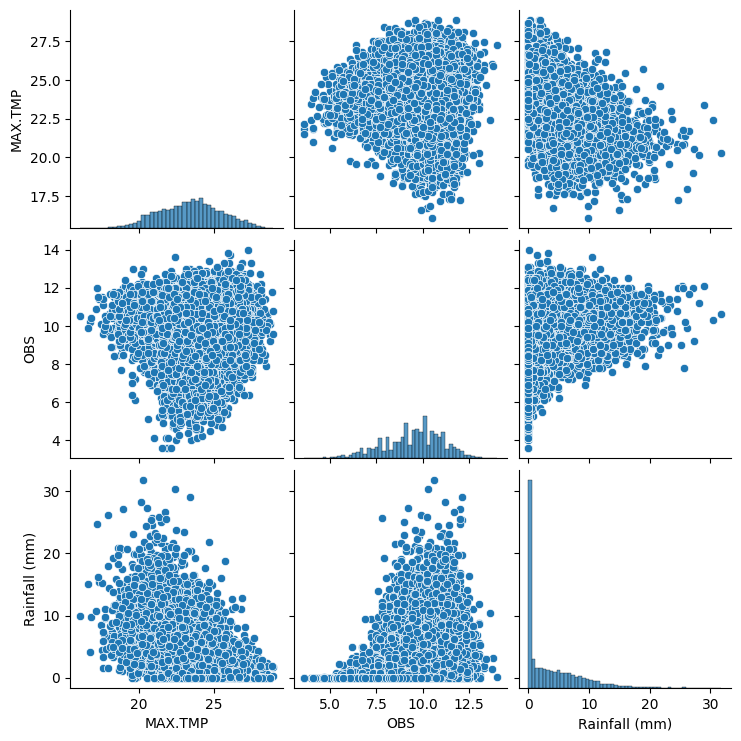

In [104]:
sns.pairplot(df_merged[['MAX.TMP', 'OBS', 'Rainfall (mm)']])
plt.show()

# Using monthly average values

In [105]:
# df_merged_avg.set_index('month_year', inplace=True)

df_merged_avg.columns

Index(['month_year', 'monthly_avg_MAX.TMP', 'monthly_avg_OBS',
       'monthly_avg_Rainfall (mm)'],
      dtype='object')

In [ ]:
all_years = df_merged_avg.index.year
list_unique_years = all_years.unique()

In [ ]:
num_years = 5
initial_index = 14

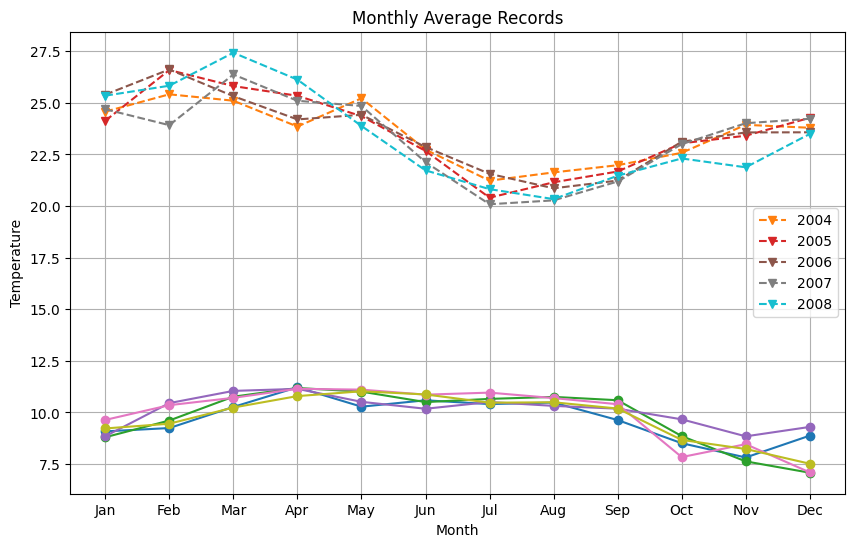

In [ ]:
plt.figure(figsize=(10, 6))

for i in range(initial_index,initial_index+num_years):
    # print(list_unique_years[i])
    selected_year = list_unique_years[i]
    # Filter the DataFrame for the selected year
    selected_year_data = df_merged_avg[df_merged_avg.index.year == int(selected_year)]

    plt.plot(selected_year_data.index.month, selected_year_data['monthly_avg_OBS'], marker='o', linestyle='-')
    plt.plot(selected_year_data.index.month, selected_year_data['monthly_avg_MAX.TMP'], marker='v', linestyle='--', label=selected_year)

plt.title(f"Monthly Average Records")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(loc='best')
plt.show()


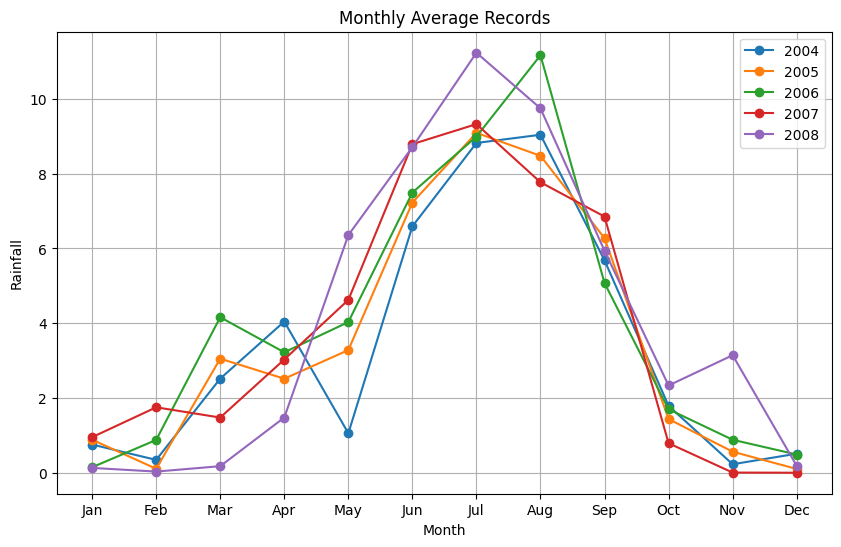

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(initial_index,initial_index+num_years):
    # print(list_unique_years[i])
    selected_year = list_unique_years[i]
    # Filter the DataFrame for the selected year
    selected_year_data = df_merged_avg[df_merged_avg.index.year == int(selected_year)]

    # monthly_avg_Rainfall (mm)
    # Plot the data
    plt.plot(selected_year_data.index.month, selected_year_data['monthly_avg_Rainfall (mm)'], marker='o', linestyle='-', label=selected_year)

plt.title(f"Monthly Average Records")
plt.xlabel("Month")
plt.ylabel("Rainfall")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(loc='best')
plt.show()


In [ ]:
df_observedflow.columns

Index(['flow', 'month_year'], dtype='object')

In [243]:
# df_observedflow.set_index('month_year', inplace=True)

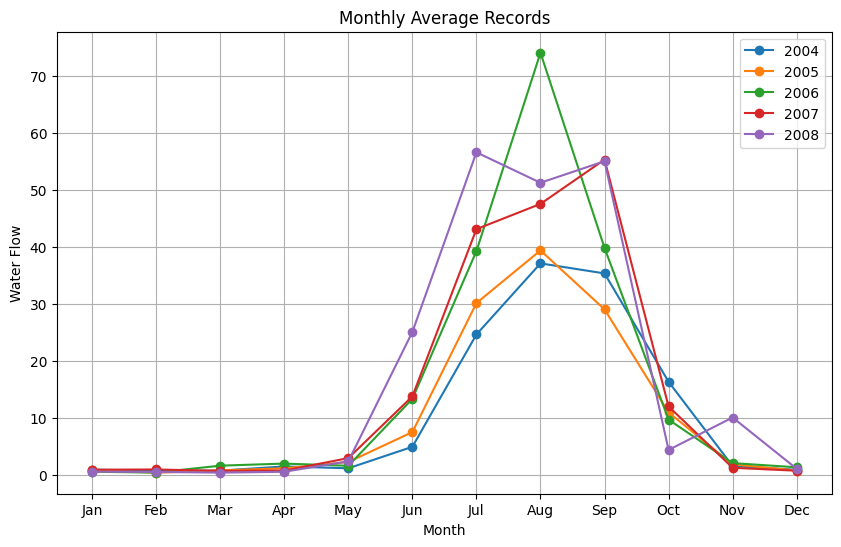

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(initial_index,initial_index+num_years):
    # print(list_unique_years[i])
    selected_year = list_unique_years[i]
    # Filter the DataFrame for the selected year
    selected_year_data = df_observedflow[df_observedflow.index.year == int(selected_year)]

    # monthly_avg_Rainfall (mm)
    # Plot the data
    plt.plot(selected_year_data.index.month, selected_year_data['flow'], marker='o', linestyle='-', label=selected_year)

plt.title(f"Monthly Average Records")
plt.xlabel("Month")
plt.ylabel("Water Flow")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(loc='best')
plt.show()


In [ ]:
print(df_observedflow.shape)
print(df_merged_avg.shape)

(240, 1)
(300, 3)


In [ ]:
all_years_flow = df_observedflow.index.year
list_unique_years_flow = all_years_flow.unique()
list_unique_years_flow

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
      dtype='int64', name='month_year')

In [262]:
flow = df_observedflow['flow']
df_temp = df_merged_avg.copy()
df_temp['flow'] = flow


In [267]:
df_temp.isna().sum()

monthly_avg_MAX.TMP          0
monthly_avg_OBS              0
monthly_avg_Rainfall (mm)    0
flow                         0
dtype: int64

In [266]:
df_temp.dropna(how='any', inplace=True)

In [268]:
df_temp.shape

(240, 4)

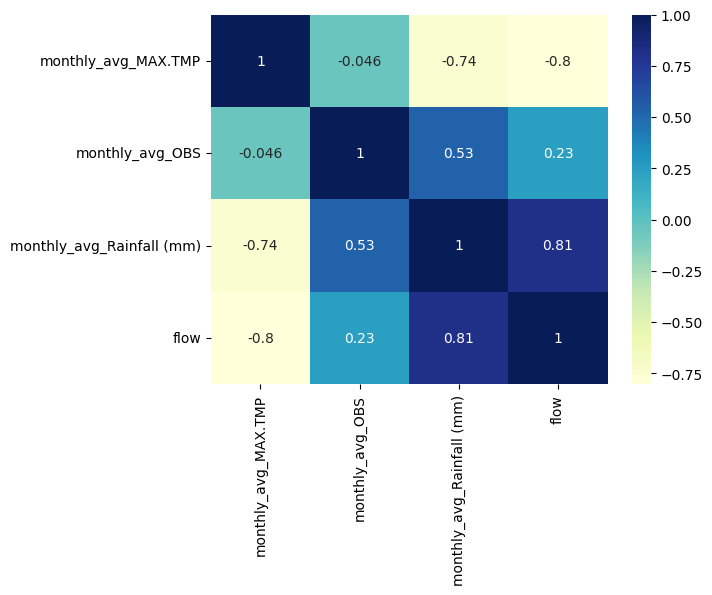

In [ ]:
corrln = df_temp[['monthly_avg_MAX.TMP', 'monthly_avg_OBS', 'monthly_avg_Rainfall (mm)', 'flow']].corr()
dataplot = sns.heatmap(corrln, cmap="YlGnBu", annot=True) 
plt.show()

In [ ]:
df_temp.columns

Index(['monthly_avg_MAX.TMP', 'monthly_avg_OBS', 'monthly_avg_Rainfall (mm)',
       'flow'],
      dtype='object')

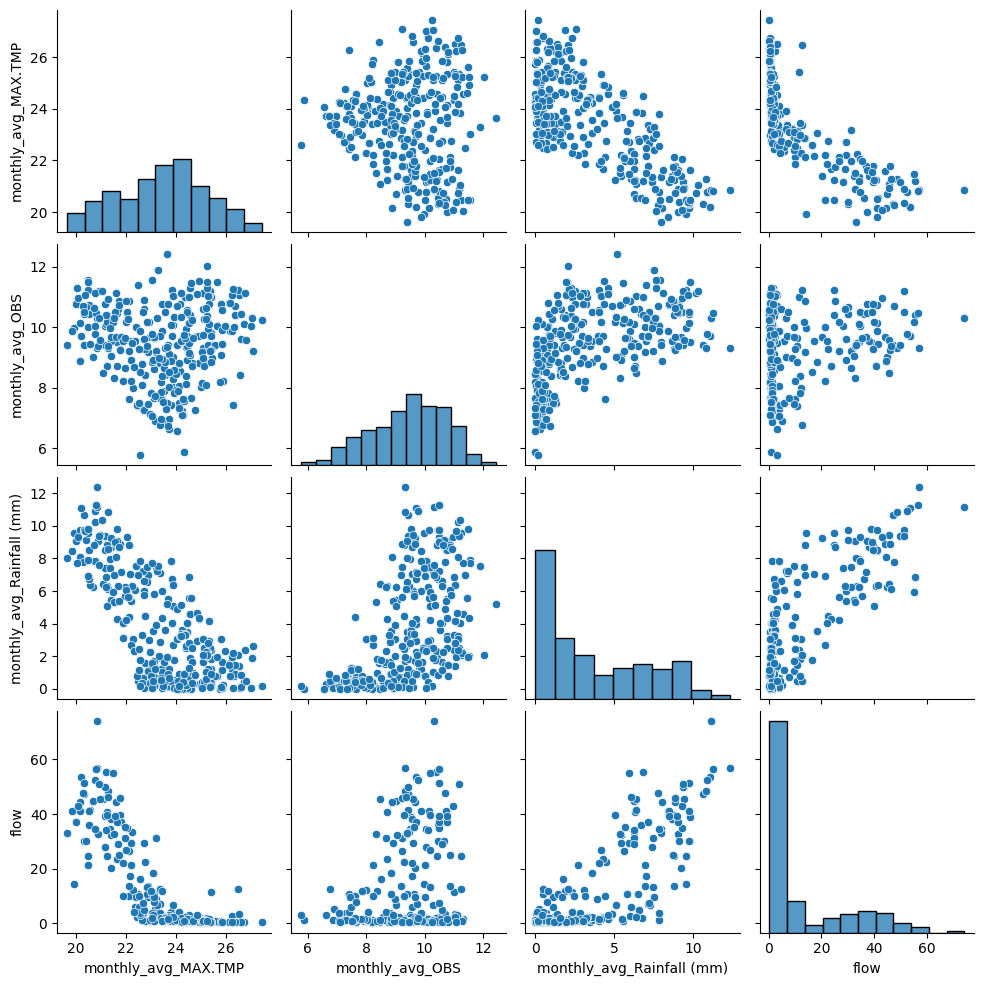

In [ ]:
cols_to_plot = ['monthly_avg_MAX.TMP', 'monthly_avg_OBS', 'monthly_avg_Rainfall (mm)', 'flow']
sns.pairplot(df_temp[cols_to_plot])
plt.show()

<Figure size 1400x600 with 0 Axes>

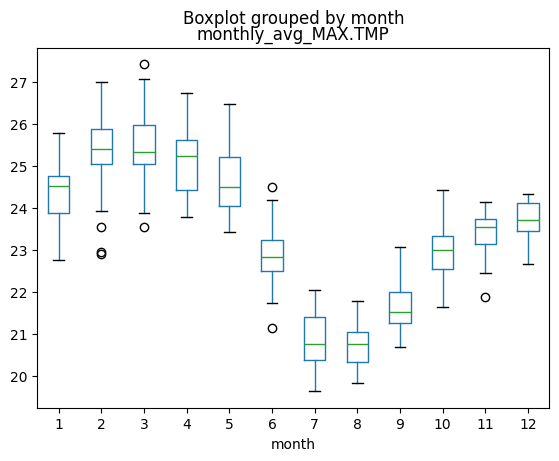

In [ ]:
plt.figure(figsize=(14,6))
df_temp.assign(month=df_temp.index.month).boxplot(by ='month', column =['monthly_avg_MAX.TMP'], grid = False) 
plt.show()

MACHINE LEARNING PART

In [221]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import xgboost as xg 
import numpy as np

In [161]:
df_temp.index

PeriodIndex(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
             '1990-07', '1990-08', '1990-09', '1990-10',
             ...
             '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08',
             '2009-09', '2009-10', '2009-11', '2009-12'],
            dtype='period[M]', name='month_year', length=240)

In [213]:
# df_temp.drop(columns=['ratio_temp_rainfall', 'avg_temmp_rainfall'], axis=1, inplace=True)

In [214]:
df_temp

,monthly_avg_MAX.TMP,monthly_avg_OBS,monthly_avg_Rainfall (mm),flow
month_year,,,,
1990-01,23.885806,7.996774,0.406774,0.697032
1990-02,22.907143,10.167857,3.013214,1.296357
1990-03,23.885806,10.077419,2.690000,1.788548
1990-04,24.582667,10.413333,1.874000,1.253267
1990-05,24.862581,9.709677,2.956129,2.202581
...,...,...,...,...
2009-08,20.907097,11.187097,9.389032,51.142452
2009-09,21.992000,10.183333,4.202333,26.657967
2009-10,22.541935,9.293548,2.463548,10.115806


In [222]:
X = df_temp.drop(columns=['flow','monthly_avg_OBS'], axis=1)


Y= df_temp['flow']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [231]:
rfr = RandomForestRegressor(max_depth= None,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 300)

In [223]:
# rfr = RandomForestRegressor()
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }


In [224]:
# grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:
# grid_search.fit(x_train, y_train)

In [226]:
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

In [230]:
# best_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [227]:
# y_predict = best_model.predict(x_test)

In [232]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=5,
                      n_estimators=300)

In [233]:
y_predict = rfr.predict(x_test)

In [234]:

metrics.r2_score(y_predict, y_test)

0.8597736594305734

In [235]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict)) 
print("RMSE : % f" %(rmse)) 

RMSE :  6.563194


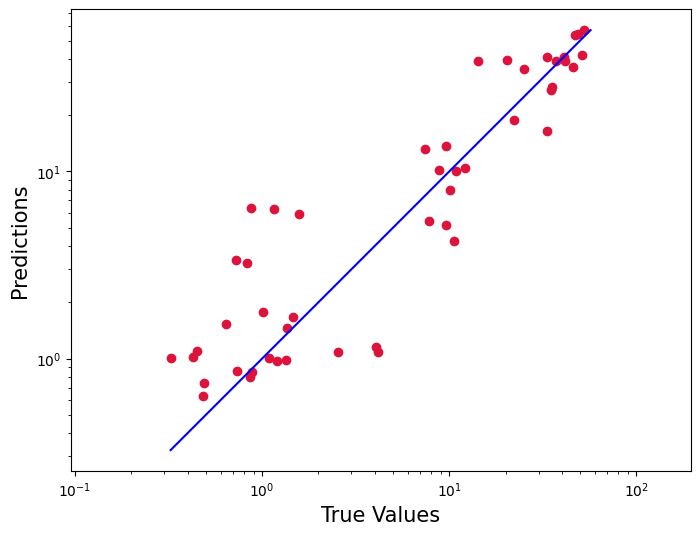

In [236]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict), max(y_test))
p2 = min(min(y_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Feature Importance

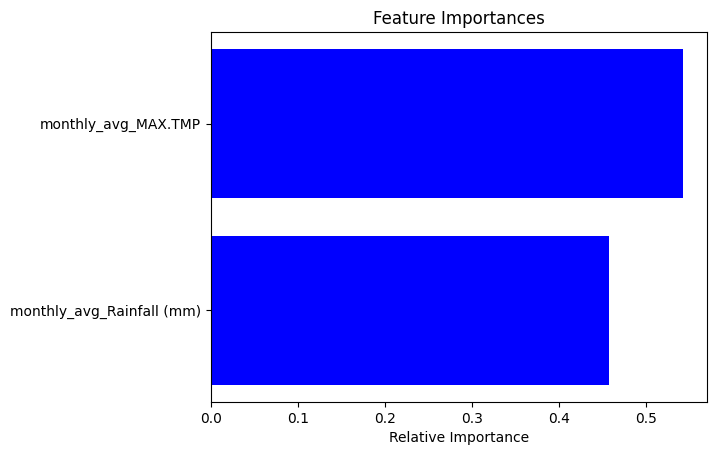

In [238]:
features = ['monthly_avg_MAX.TMP', 'monthly_avg_Rainfall (mm)']
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# xgb_r = xg.XGBRegressor(objective ='reg:linear', 
#                   n_estimators = 10, seed = 123) 
  
# # Fitting the model 
# xgb_r.fit(x_train, y_train) 
  
# # Predict the model 
# y_predict = xgb_r.predict(x_test) 
  
# # RMSE Computation 
# rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict)) 
# print("RMSE : % f" %(rmse)) 

### Using Time series statistical model
River flow forecast from the historical flow itself resulted in poor prediction but maximum temperature and rain fall can be well forcasted from the historical data using SARIMA time series model, which is capable of handling the seasonality and trends in the data set.

In [394]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [270]:
df_temp

,monthly_avg_MAX.TMP,monthly_avg_OBS,monthly_avg_Rainfall (mm),flow
month_year,,,,
1990-01,23.885806,7.996774,0.406774,0.697032
1990-02,22.907143,10.167857,3.013214,1.296357
1990-03,23.885806,10.077419,2.690000,1.788548
1990-04,24.582667,10.413333,1.874000,1.253267
1990-05,24.862581,9.709677,2.956129,2.202581
...,...,...,...,...
2009-08,20.907097,11.187097,9.389032,51.142452
2009-09,21.992000,10.183333,4.202333,26.657967
2009-10,22.541935,9.293548,2.463548,10.115806


In [399]:
x_train = df_temp[df_temp.index.year < 2006]
x_test = df_temp[df_temp.index.year >= 2006]

def get_prediction_sarima(selected_col = 'monthly_avg_MAX.TMP'):
    y_train = x_train[selected_col]
    y_test= x_test[selected_col]

    ARMAmodel = SARIMAX(y_train, order = (1, 0, 1))
    ARMAmodel = ARMAmodel.fit()
    
    # SARIMAXmodel = SARIMAX(y_train, order = (5, 4, 2), seasonal_order=(2,2,2,12))
    SARIMAXmodel = SARIMAX(y_train, order = (1, 2, 3), seasonal_order=(2,2,2,12))
    SARIMAXmodel = SARIMAXmodel.fit()

    y_pred = SARIMAXmodel.get_forecast(len(x_test.index))
    y_pred_df = y_pred.conf_int(alpha = 0.05) 
    y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
    y_pred_df.index = x_test.index
    y_pred_out= y_pred_df["Predictions"] 
    return (y_test, y_pred_out)


In [419]:
def plot_forecast(y_test, y_pred_out, col, ylabel, title):
    x_test_temp = x_test.copy()
    x_test_temp[col] = y_pred_out

    _rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_out))
    print("RMSE: ",_rmse)

    plt.figure(figsize=(12,4))
    x_train[col].plot(color='red')
    x_test[col].plot(color='blue')
    x_test_temp[col].plot(color='green')

    plt.ylabel(ylabel)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

### Maximum temperature

c:\BeCode\RiverFlow-Pridiction\.env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  1.2287026313198193


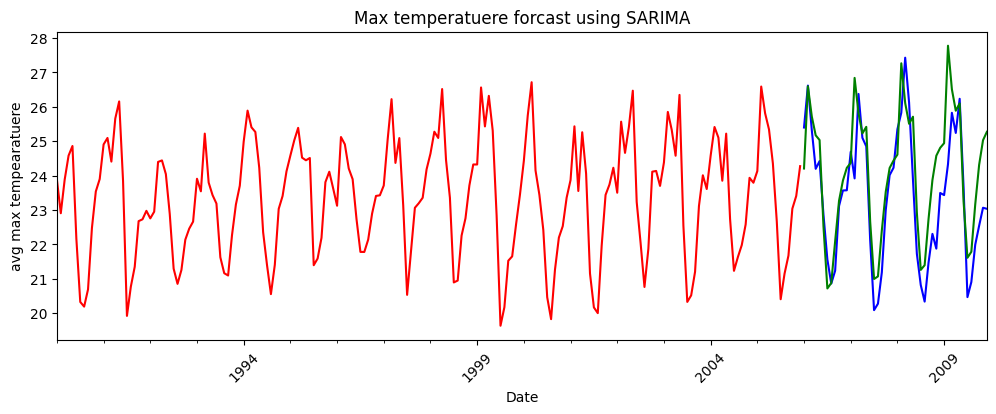

In [420]:
col = 'monthly_avg_MAX.TMP'
y_test , y_pred_out = get_prediction_sarima(col)
plot_forecast(y_test, y_pred_out, col, "avg max tempearatuere", "Max temperatuere forcast using SARIMA")



### Rain fall

c:\BeCode\RiverFlow-Pridiction\.env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\BeCode\RiverFlow-Pridiction\.env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  1.373857849739094


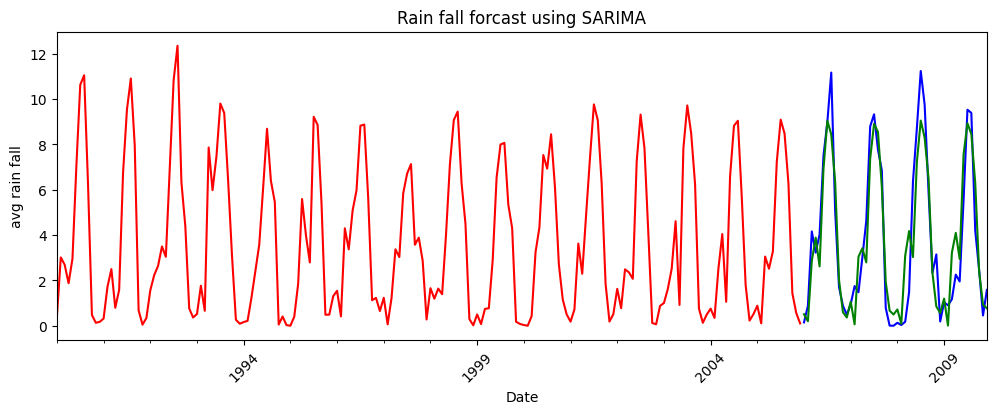

In [421]:
col = 'monthly_avg_Rainfall (mm)'
y_test , y_pred_out = get_prediction_sarima(col)
plot_forecast(y_test, y_pred_out, col, "avg rain fall", "Rain fall forcast using SARIMA")

### River flow

c:\BeCode\RiverFlow-Pridiction\.env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\BeCode\RiverFlow-Pridiction\.env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  12.817430835967446


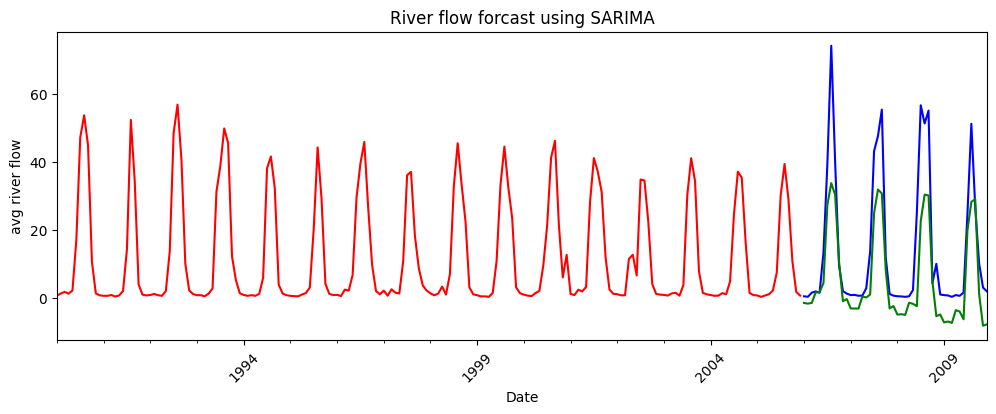

In [422]:
col = 'flow'
y_test , y_pred_out = get_prediction_sarima(col)
plot_forecast(y_test, y_pred_out, col, "avg river flow", "River flow forcast using SARIMA")